# Exploratory data analysis

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from wordcloud import WordCloud, STOPWORDS

## Research questions on the teleco_data
1. What is the average life time value(LTV) and tenure for the churned customers?
2. What subscription were the churned customers active on?
3. What is the average Life Time Value(LTV) and tenure for the active customers?
4. In what proportions are the contract types engaged in by active and churned customers?
5. Among the demographics such as the 'gender', 'partners', 'dependents', 'Phone service', 'Internet Service', 'contract' and 'PaymentMethod', what variable affected the long term value the most?
6. What variable among the internet services subsets affect customers LTV the most?

In [2]:
#reading in the dataset
telecom_data = pd.read_csv('cleaned_teleco_data.csv')
clone = telecom_data.copy()

In [3]:
telecom_data.columns
telecom_data.drop(columns='tenure_group', inplace=True)

In [4]:
telecom_data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,F,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,M,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1936.30,No
2,2,3668-QPYBK,M,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,107.70,Yes
3,3,7795-CFOCW,M,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1903.50,No
4,4,9237-HQITU,F,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,141.40,Yes


In [5]:
clone['Churn'] = clone['Churn'].replace('Yes', 1).replace('No', 0)
clone.head(5)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,7590-VHVEG,F,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,1,5575-GNVDE,M,0,No,No,34,Yes,No,DSL,...,No,No,No,One year,No,Mailed check,56.95,1936.30,0,25-36
2,2,3668-QPYBK,M,0,No,No,2,Yes,No,DSL,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,107.70,1,1-12
3,3,7795-CFOCW,M,0,No,No,45,No,No phone service,DSL,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1903.50,0,37-48
4,4,9237-HQITU,F,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,141.40,1,1-12


In [6]:
telecom_data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,F,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,M,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1936.30,No
2,2,3668-QPYBK,M,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,107.70,Yes
3,3,7795-CFOCW,M,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1903.50,No
4,4,9237-HQITU,F,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,141.40,Yes


In [7]:
#total number of churned customers 
churned_customers = telecom_data.query("Churn=='Yes'")

churned_customers.shape[0]

1869

In [8]:
telecom_data.drop(columns=['Unnamed: 0'], inplace=True)

array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>,
        <AxesSubplot:title={'center':'TotalCharges'}>]], dtype=object)

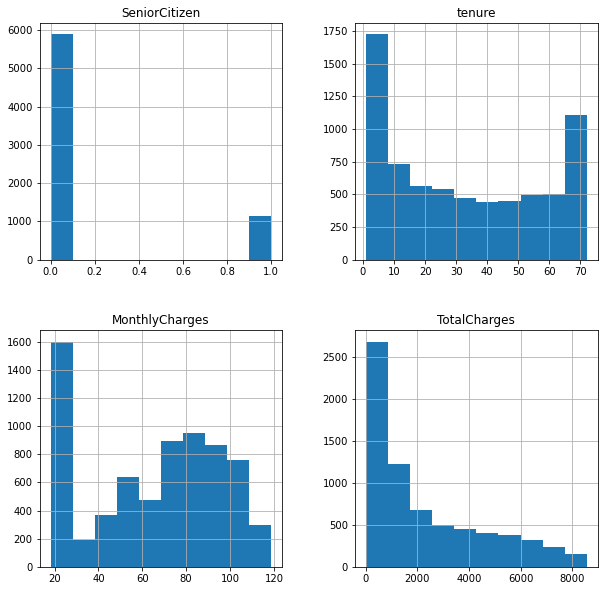

In [9]:
''''histogram visualization plot showing thediscrete and continuous variables in the
telecom da
ta measured on an interval scale'''
telecom_data.hist(figsize=(10, 10))

In [10]:
def plot(title="", xscale="", yscale="", xlabel="",
         ylabel="", xlim="", ylim="", xticks1="", xticks2="",
         yticks1="", yticks2="", legend_title="", legend_labels=''):
    if title:
        plt.title(title)
    if xscale:
        plt.xscale(xscale)
    if yscale:
        plt.yscale(yscale)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
    if xticks1:
        plt.xticks(xticks1, xticks2)
    if yticks1:
        plt.yticks(yticks1, yticks2)
    if legend_title:
        plt.legend(title=legend_title)
    else:
        return None
    

### Research Question 1: What was the average life time value of the churned customers? and how long did they stay in the telecom provided service?

In [11]:
churned_customers = telecom_data.query("Churn=='Yes'")

In [12]:
churned_customers.TotalCharges.describe()

count    1869.000000
mean     1531.608828
std      1886.774930
min        18.850000
25%       137.900000
50%       700.000000
75%      2334.800000
max      8481.600000
Name: TotalCharges, dtype: float64

<AxesSubplot:>

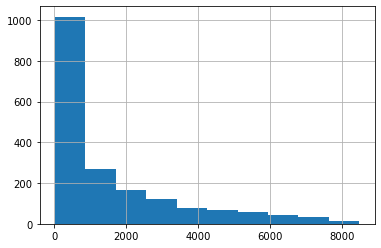

In [13]:
#visualization of the totalCharges column
churned_customers.TotalCharges.hist()

#### from the visualization above, it is observed that about 20% of the TotalCharges data are extremely high, so a division would be done to see each distribution of the data

In [14]:
#80th percentile of the totalCharges of the churned customers
cc_percentile = churned_customers.TotalCharges.quantile(0.8)
cc_percentile

2827.5900000000006

In [15]:
#dividing the customers totalCharges into two categories(above and below the 80th percentile)
TotalCharges_above80p = churned_customers.query("TotalCharges >= 2827.59")
TotalCharges_below80p = churned_customers.query("TotalCharges <= 2827.59")

In [16]:
TotalCharges_below80p.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,M,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,107.70,Yes
4,9237-HQITU,F,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,141.40,Yes
5,9305-CDSKC,F,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,797.20,Yes
18,4190-MFLUW,F,0,Yes,Yes,10,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,552.00,Yes
20,8779-QRDMV,M,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes


In [17]:
TotalCharges_above80p.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,F,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,2934.40,Yes
13,0280-XJGEX,M,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5081.30,Yes
26,6467-CHFZW,M,0,Yes,Yes,47,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4669.45,Yes
38,5380-WJKOV,M,0,No,No,34,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.35,3615.90,Yes
104,3192-NQECA,M,0,Yes,No,68,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.00,7480.00,Yes


In [18]:
TotalCharges_above80p.TotalCharges.describe()

count     374.000000
mean     4801.610160
std      1432.384076
min      2830.500000
25%      3523.275000
50%      4607.300000
75%      5863.450000
max      8481.600000
Name: TotalCharges, dtype: float64

In [19]:
TotalCharges_below80p.TotalCharges.describe()

count    1495.000000
mean      713.561672
std       769.669864
min        18.850000
25%        85.900000
50%       377.600000
75%      1132.575000
max      2825.650000
Name: TotalCharges, dtype: float64

In [20]:
TotalCharges_above80p.tenure.describe()

count    374.000000
mean      50.141711
std       12.322030
min       28.000000
25%       40.000000
50%       49.500000
75%       60.000000
max       72.000000
Name: tenure, dtype: float64

In [21]:
TotalCharges_below80p.tenure.describe()

count    1495.000000
mean        9.933110
std        10.738504
min         1.000000
25%         1.000000
50%         6.000000
75%        15.000000
max        61.000000
Name: tenure, dtype: float64

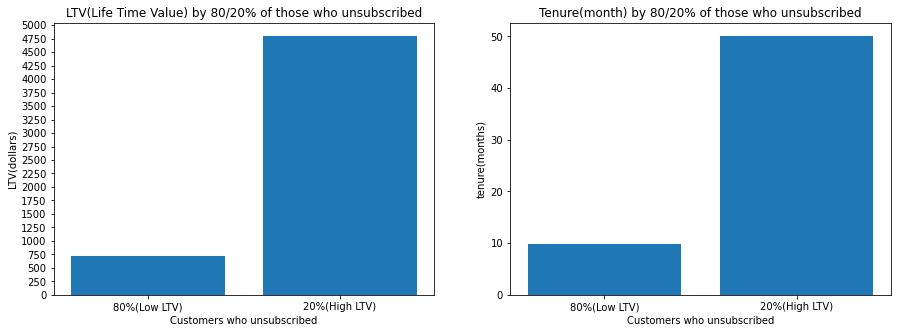

In [22]:
#Average life time value of customers who churned 
'''y axis LTV plot based on the interval of the mean of the under and above
80th percentile of TotalCharges of the each customers''' 
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.bar([1, 2], [713, 4801])
plot(yticks1=range(0,5250,250), yticks2=range(0, 5250, 250), xticks1=[1,2],xticks2=['80%(Low LTV)', '20%(High LTV)'],ylabel='LTV(dollars)',xlabel='Customers who unsubscribed', title='LTV(Life Time Value) by 80/20% of those who unsubscribed')


#right plot
'''y axis tenure plot based on the interval of the mean of below and above 80th percentile of customer's tenure'''
plt.subplot(1, 2, 2)
plt.bar([1, 2], [9.9, 50.1])
plot(yticks2=[0, 50, 10], xticks1=[1,2], xticks2=['80%(Low LTV)', '20%(High LTV)'], ylabel='tenure(months)', xlabel='Customers who unsubscribed', title='Tenure(month) by 80/20% of those who unsubscribed')

> Note: The 80% Life Time Value(LTV) of churned customers is 750dollars, and their tenure before churn was near 10months.
On the other hand, 20% Life Time Value(LTV) of churned customer is 4750dollars, and their tenure before churn was about 50months(ie 4yrs+). it is therefore advisable to focus on retaining the 20% customers having an higher LTV of 4750dollars 

###  Research Question 2: What subscription were the churned customers active on?

> Note: After discovering the big difference in LTV and tenures between 80/20% of those who unsubscribed, so I decided to investigate this question in both 80/20% groups.

In [23]:
telecom_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [24]:
telecom_data.InternetService.value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [25]:
'''Query function to deduce the number of the customers having 80% low(LTV) 
using an Internet service or other related internet services'''

TotalCharges_below80p_use_internet = TotalCharges_below80p.query('InternetService != "No"')

In [26]:
#Percentage rate of 80% Low(LTV) customers using internet services for online security
TotalCharges_below80p_use_internet.query("OnlineSecurity=='Yes'").shape[0]/TotalCharges_below80p_use_internet.shape[0] *100
#Percentage rate of 80% Low(LTV) customers using internet services for online backup
TotalCharges_below80p_use_internet.query("OnlineBackup=='Yes'").shape[0]/TotalCharges_below80p_use_internet.shape[0]*100
#Percentage rate of 80% Low(LTV) customers using internet services for deviceprotection
TotalCharges_below80p_use_internet.query("DeviceProtection=='Yes'").shape[0]/TotalCharges_below80p_use_internet.shape[0]*100
#Percentage rate of 80% Low(LTV) customers using internet services for tech support
TotalCharges_below80p_use_internet.query("TechSupport=='Yes'").shape[0]/TotalCharges_below80p_use_internet.shape[0]*100
#Percentage rate of 80% Low(LTV) customers using internet services for streamingtv
TotalCharges_below80p_use_internet.query("StreamingTV =='Yes'").shape[0]/TotalCharges_below80p_use_internet.shape[0]*100
#Percentage rate of 80% Low(LTV) customers using internet services for streamingmovies
TotalCharges_below80p_use_internet.query("StreamingMovies == 'Yes'").shape[0]/TotalCharges_below80p_use_internet.shape[0]*100

38.205499276411

In [27]:
'''a query function to deduce the number of the customers having high 20%(LTV) 
using an Internet service or other related internet services'''
TotalCharges_above80p_use_internet_service =TotalCharges_above80p.query("InternetService !='No'")

In [28]:
#Percentage rate of 20% Low(LTV) customers using internet services for Online security
TotalCharges_above80p_use_internet_service.query("OnlineSecurity=='Yes'").shape[0]/TotalCharges_above80p_use_internet_service.shape[0]*100
#Percentage rate of 20% Low(LTV) customers using internet services for Online backup
TotalCharges_above80p_use_internet_service.query("OnlineBackup=='Yes'").shape[0]/TotalCharges_above80p_use_internet_service.shape[0]*100
#Percentage rate of 20% Low(LTV) customers using internet services for device protection
TotalCharges_above80p_use_internet_service.query("DeviceProtection=='Yes'").shape[0]/TotalCharges_above80p_use_internet_service.shape[0]*100
#Percentage rate of 20% Low(LTV) customers using internet services for tech support
TotalCharges_above80p_use_internet_service.query("TechSupport=='Yes'").shape[0]/TotalCharges_above80p_use_internet_service.shape[0]*100
#Percentage rate of 20% Low(LTV) customers using internet services for streamingtv
TotalCharges_above80p_use_internet_service.query("StreamingTV=='Yes'").shape[0]/TotalCharges_above80p_use_internet_service.shape[0]*100
#Percentage rate of 20% Low(LTV) customers using internet services for streaming movies
TotalCharges_above80p_use_internet_service.query("StreamingMovies=='Yes'").shape[0]/TotalCharges_above80p_use_internet_service.shape[0]*100

77.54010695187165

In [29]:
TotalCharges_below80p.PhoneService.value_counts()

Yes    1334
No      161
Name: PhoneService, dtype: int64

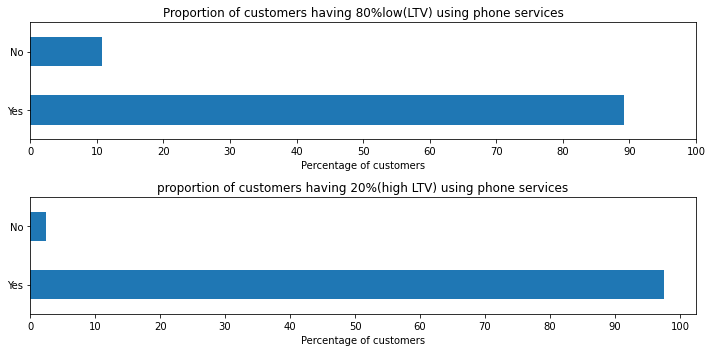

In [30]:
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
((TotalCharges_below80p.PhoneService.value_counts()/TotalCharges_below80p.shape[0])*100).plot.barh()
plot(title="Proportion of customers having 80%low(LTV) using phone services", xlabel="Percentage of customers", xticks1=range(0, 110, 10), xticks2=range(0, 110, 10))
#
plt.subplot(2, 1, 2)
((TotalCharges_above80p.PhoneService.value_counts()/TotalCharges_above80p.shape[0]*100)).plot.barh()
plot(title="proportion of customers having 20%(high LTV) using phone services", xlabel='Percentage of customers', xticks1 = range(0, 110, 10), xticks2=range(0, 110, 10))
plt.tight_layout()
# details = np.array(TotalCharges_above80p.PhoneService.value_counts()/TotalCharges_above80p.shape[0] * 100)
# details
# second_details = np.array(TotalCharges_below80p.PhoneService.value_counts()/TotalCharges_below80p.shape[0]*100)
# second_details

> Note: visualization 1 illustrates that the proportion of customers having 80%low(LTV) using phone services are about 89.2% and those not using phone services under the 80%low(LTV) category are about 10.7%
Visualization 2 illustrates that the proportion of customers having 20%(high LTV) using phone services are about 97.5% and those not using phone services under this category are about 2.4% which is about 5times lesser than those under the 80%low(LTV) category

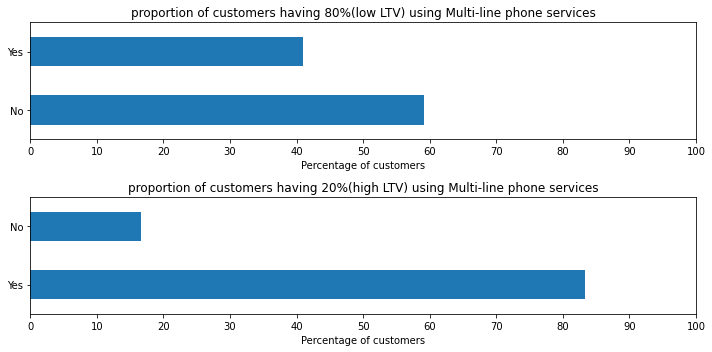

In [31]:
#diagrammatic illustration for those using Multiple lines
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
telecom_data_under80_use_phone = TotalCharges_below80p.query("PhoneService == 'Yes'")
(telecom_data_under80_use_phone.MultipleLines.value_counts()/telecom_data_under80_use_phone.shape[0] *100).plot.barh()
plot(title="proportion of customers having 80%(low LTV) using Multi-line phone services", xlabel="Percentage of customers", xticks1 = range(0, 110, 10), xticks2=range(0, 110, 10))

plt.subplot(2, 1, 2)
telecom_data_above80_use_phone = TotalCharges_above80p.query("PhoneService == 'Yes'")
(telecom_data_above80_use_phone.MultipleLines.value_counts()/telecom_data_above80_use_phone.shape[0] *100).plot.barh()
plot(title="proportion of customers having 20%(high LTV) using Multi-line phone services", xlabel="Percentage of customers", xticks1= range(0, 110, 10), xticks2=range(0, 110, 10))
plt.tight_layout()


>Note: visualization 1 illustrates that the proportion of customers having 80%low(LTV) using Muliple lines is about 41% and customers not using Muliple lines under the 80%low(LTV) category are about 59%
Visualization 2 illustrates that the proportion of customers having 20%(high LTV) using Muliple lines is about 83% and customers not using Muliple lines under this category are about 16.7% 

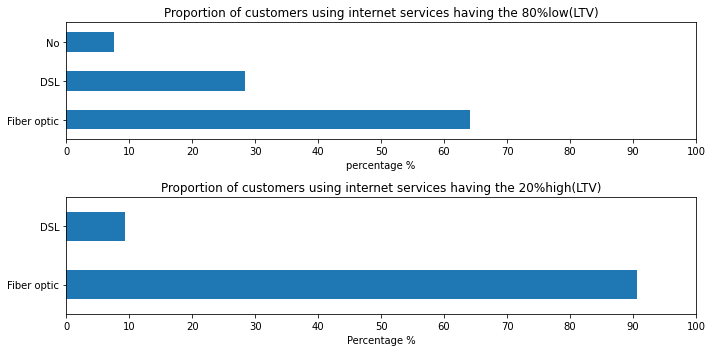

In [32]:
#internetservice
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
#for 80%low(LTV)
(TotalCharges_below80p.InternetService.value_counts()/TotalCharges_below80p.shape[0]*100).plot.barh()
plot(title="Proportion of customers using internet services having the 80%low(LTV)", xlabel="percentage %", xticks1=range(0, 110, 10), xticks2=range(0, 110, 10))

plt.subplot(2, 1, 2)
# for 20%low(LTV)
(TotalCharges_above80p.InternetService.value_counts()/TotalCharges_above80p.shape[0]*100).plot.barh()
plot(title="Proportion of customers using internet services having the 20%high(LTV)", xlabel="Percentage %", xticks1=range(0, 110, 10), xticks2=range(0, 110, 10))

plt.tight_layout()

> Note:

### Reserach Question 3: What is the average Life Time Value(LTV) for the active customers?

In [33]:
active_customers = telecom_data.query("Churn == 'No'")

In [34]:
active_customers.TotalCharges.describe()

count    5163.000000
mean     2555.203283
std      2327.899069
min        18.800000
25%       580.400000
50%      1691.750000
75%      4252.800000
max      8550.000000
Name: TotalCharges, dtype: float64

<AxesSubplot:>

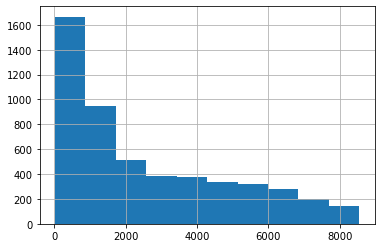

In [35]:
active_customers.TotalCharges.hist()

In [36]:
#80% percentile of the not churned customers
active_customer_pp = active_customers.TotalCharges.quantile(0.8)
active_customer_pp

4897.920000000003

In [37]:
active_customer_below80p = active_customers.query("TotalCharges <= 4897.92")
active_customer_above80p = active_customers.query("TotalCharges >= 4897.92")

In [38]:
active_customer_below80p.TotalCharges.describe()

count    4130.000000
mean     1595.406453
std      1389.868832
min        18.800000
25%       422.025000
50%      1205.500000
75%      2516.812500
max      4894.050000
Name: TotalCharges, dtype: float64

In [39]:
active_customer_above80p.TotalCharges.describe()

count    1033.000000
mean     6392.532333
std       975.331418
min      4900.500000
25%      5595.000000
50%      6241.050000
75%      7114.200000
max      8550.000000
Name: TotalCharges, dtype: float64

In [40]:
active_customer_above80p.tenure.describe()

count    1033.000000
mean       65.458858
std         6.840408
min        43.000000
25%        61.000000
50%        68.000000
75%        71.000000
max        72.000000
Name: tenure, dtype: float64

In [41]:
active_customer_below80p.tenure.describe()

count    4130.000000
mean       30.694431
std        21.706425
min         1.000000
25%        11.000000
50%        28.000000
75%        48.000000
max        72.000000
Name: tenure, dtype: float64

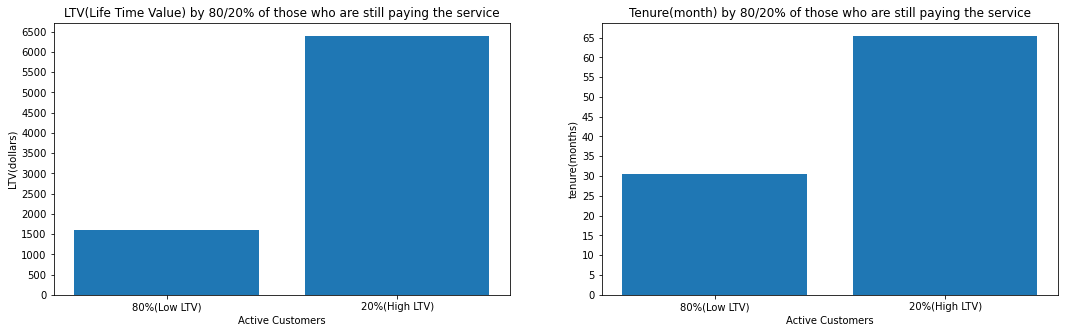

In [42]:
plt.figure(figsize=(18, 5))
# for the 80/20%(LTV) of the active customers
plt.subplot(1, 2, 1)
plt.bar([1, 2], [1595.4, 6392.5])
plot(yticks1=range(0,7000,500), yticks2=range(0,7000,500), xticks1=[1,2],xticks2=['80%(Low LTV)', '20%(High LTV)'],ylabel='LTV(dollars)',xlabel='Active Customers', title='LTV(Life Time Value) by 80/20% of those who are still paying the service')

#tenure of the active customers
plt.subplot(1, 2, 2)
plt.bar([1, 2], [30.6, 65.4])
plot(yticks1=range(0,70,5), yticks2=range(0,70,5), xticks1=[1,2],xticks2=['80%(Low LTV)', '20%(High LTV)'],ylabel='tenure(months)',xlabel='Active Customers', title='Tenure(month) by 80/20% of those who are still paying the service')

>Note: From the above visualizations, The following informations were given off : 
    
    
    1. 80% low customers have a LTV of 1500dollars and a tenure of 30months 
    2. 20% High customers have a LTV of 6000dollars and a tenure of about 65months.
Therefore, it is advisable to focus on offering better services to those customers under the 20%(High LTV) since they generate more revenue for the organization.

### Research Question 5: In what proportions are the contract types  engaged in by active and churned customers?


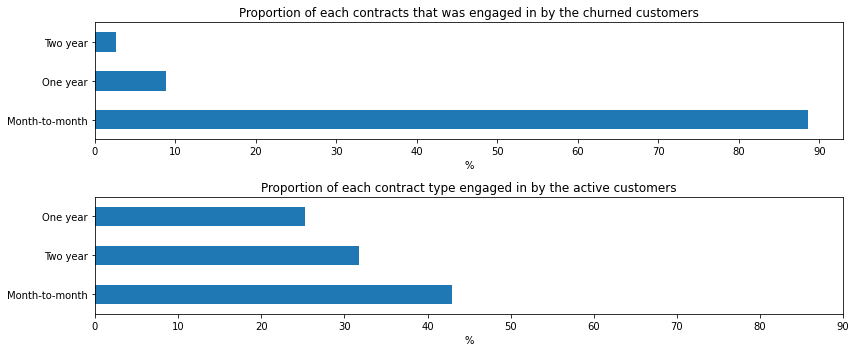

In [43]:
#visualizes the plot for the contract type engaged in by churned customers

plt.figure(figsize=(12,5))
plt.subplot(2, 1, 1)
(churned_customers.Contract.value_counts()/churned_customers.shape[0]*100).plot.barh()
plot(title="Proportion of each contracts that was engaged in by the churned customers", xlabel="%", xticks1=range(0, 100, 10), xticks2=range(0, 100,10))

#visualizes the plot for the contract type engaged in by active customers
plt.subplot(2, 1, 2)
(active_customers.Contract.value_counts()/active_customers.shape[0]*100).plot.barh()
plot(title="Proportion of each contract type engaged in by the active customers", xlabel="%", xticks1=range(0, 100, 10), xticks2=range(0, 100, 10))
plt.tight_layout()

> Note:
1. In the data of leaked customers, there are 88% used month contract, 9% used one year contract, and 2 % two year contract. 
2. In the data of current customers, there are 43% using month contract, 25% used one year contract, and 32% two year contract.

### Research Question 5: Among the demographics such as the 'gender', 'partners', 'dependents', 'Phone service', 'Internet Service', 'contract' and 'PaymentMethod', what variable affected the long term value the most?

In [44]:
telecom_data[['Female', 'Male']] = pd.get_dummies(telecom_data['gender'])
telecom_data[['No', 'Partner_Yes']] = pd.get_dummies(telecom_data['Partner'])
telecom_data[['Dependents_No', 'Dependents_Yes']] = pd.get_dummies(telecom_data['Dependents'])
telecom_data[['No', 'PhoneService_Yes']] = pd.get_dummies(telecom_data['PhoneService'])
telecom_data[['DSL', 'Fiber optic', 'No']] = pd.get_dummies(telecom_data['InternetService'])
telecom_data[['Month-to-month', 'One year', 'Two year']] = pd.get_dummies(telecom_data['Contract'])
telecom_data[['matBank transfer (autoic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']] = pd.get_dummies(telecom_data['PaymentMethod'])

In [45]:
telecom_data['intercept'] = 1
lm = sm.OLS(telecom_data['TotalCharges'], telecom_data[['intercept', 'Male', 'Partner_Yes', 'Dependents_No',
                                               'PhoneService_Yes', 'DSL', 'Fiber optic', 'One year', 'Two year',
                                               'matBank transfer (autoic)', 'Credit card (automatic)', 
                                                'Electronic check']])

statistical_analysis = lm.fit()
statistical_analysis.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           TotalCharges   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     933.7
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:16:21   Log-Likelihood:                -61132.
No. Observations:                7032   AIC:                         1.223e+05
Df Residuals:                    7020   BIC:                         1.224e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
intercept                 -2389.5775     90.708    -26.344      0.000   -2567.393   -2211.762
Male                         33.4852     34.456      0.972      0.331     -34.058     101.029
Partner_Yes                 715.6571     40.230     17.789      0.000     636.795     794.520
Dependents_No               242.7633     43.263      5.611      0.000     157.955     327.571
PhoneService_Yes            657.0162     65.457     10.037      0.000     528.701     785.332
DSL                        2048.6843     52.357     39.129      0.000    1946.048    2151.320
Fiber optic                3415.9033     52.186     65.456      0.000    3313.603    3518.204
One year                   1897.1549     46.477     40.819      0.000    1806.045    1988.264
Two year                   2856.0705     48.389     59.023      0.000    2761.213    2950.928
matBank transfer (autoic)   575.6387     54.173     10.626      0.000     469.444     681.833
Credit card (automatic)     568.2210     54.271     10.470      0.000     461.833     674.609
Electronic check             24.6810     52.200      0.473      0.636     -77.647     127.009
==============================================================================
Omnibus:                      180.511   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.973
Skew:                           0.366   Prob(JB):                     5.04e-40
Kurtosis:                       2.712   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> Note:
1. 'Electronic check' feature does not have a statistical significance on affecting the LTV since it has a p-value greater than 0.05
2. 'gender' does not have statistical significance on affecting the LTV since it has a p-value greater than 0.05.
3. 'Partner' have statistical significance on affecting the LTV since it does not have a p-value greater than 0.05, and having a coefficient correlation of 717.
4. 'Dependents' have statistical significance on affecting the LTV, whose coefficient correlation is 254.
5. 'PhoneService' have statistical significance on affecting the LTV, whose coefficient correlation is 662.
6. 'InternetService' have statistical significance on affecting the LTV, for 'DSL', whose coefficient correlation is 2043. And, for 'Fiber optic', whose coefficient correlation is 3412.
7. 'Contract' have statistical significance on affecting the LTV, for 'One year', whose coefficient correlation is 1897. And, for 'Two year', whose coefficient correlation is 2840.
8. 'PaymentMethod' have statistical significance on affecting the LTV, for 'matBank transfer', whose coefficient correlation is 583. And, for 'Credit card (automatic)', whose coefficient correlation is 579.

In [58]:
statistical_analysis.params.sort_values()[3:]

Dependents_No                 242.763288
Credit card (automatic)       568.221034
matBank transfer (autoic)     575.638713
PhoneService_Yes              657.016231
Partner_Yes                   715.657052
One year                     1897.154916
DSL                          2048.684312
Two year                     2856.070506
Fiber optic                  3415.903343
dtype: float64

### Research Question 6: What variable among the internet services subsets affect customers LTV the most?

In [46]:
telecom_data[['No','No internet service', 'OnlineServices']] = pd.get_dummies(telecom_data['OnlineSecurity'])
telecom_data[['No','No internet service', 'OnlineBackups']] = pd.get_dummies(telecom_data['OnlineBackup'])
telecom_data[['No','No internet service', 'DeviceProtections']] = pd.get_dummies(telecom_data['DeviceProtection'])
telecom_data[['No','No internet service', 'TechSupports']] = pd.get_dummies(telecom_data['TechSupport'])
telecom_data[['No','No internet service', 'StreamTV']] = pd.get_dummies(telecom_data['StreamingTV'])
telecom_data[['No','No internet service', 'StreamMovies']] = pd.get_dummies(telecom_data['StreamingMovies'])


In [47]:
lm = sm.OLS(telecom_data['TotalCharges'], telecom_data[['OnlineServices', 'OnlineBackups', 'DeviceProtections', 'TechSupports', 'StreamTV', 'StreamMovies']])
results = lm.fit()
results.params.sort_values

<bound method Series.sort_values of OnlineServices        972.399723
OnlineBackups        1350.100586
DeviceProtections    1046.208082
TechSupports          669.112222
StreamTV             1036.813743
StreamMovies         1043.847599
dtype: float64>

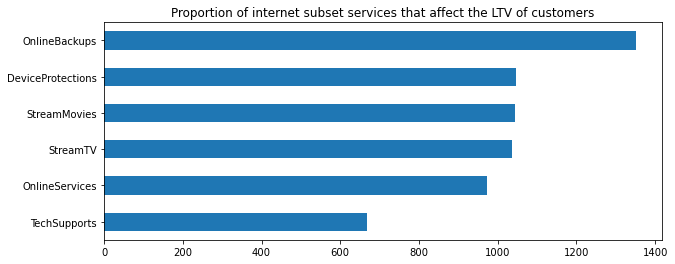

In [48]:
plt.figure(figsize=(10, 4))     
results.params.sort_values().plot.barh()
plot(title="Proportion of internet subset services that affect the LTV of customers")
# # telecom_data.columns

> Conclusion: From the visualization above, it can been deduced that the service which affects the LTV of customers the most is the OnlineBackup Service.

Therefore, it is advisable for the teleco company to work on addressing problems being faced during customers OnlineBackups

In [ ]:
#saving EDA dataset file
telecom_data.to_csv(r'C:/Users/clinton/downloads/ds_projects/customer_churn/EDA_dataset.csv')

In [56]:
telecom_data = pd.read_csv(r'C:/Users/clinton/downloads/ds_projects/customer_churn/EDA_dataset.csv')

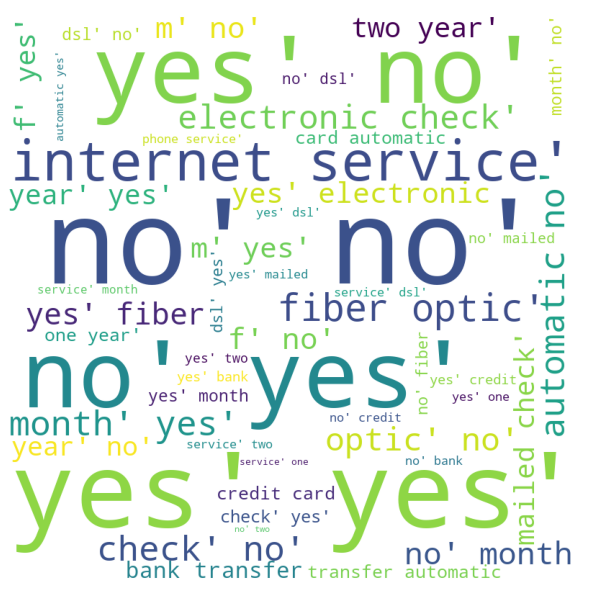

In [58]:
 comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in telecom_data.values:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()